In [3]:
import sys
import os
import tensorflow as tf

sys.path.insert(0, "..")
os.environ['SM_FRAMEWORK']='tf.keras' 
tf.config.list_physical_devices('GPU')

[]

In [72]:
from importlib import reload
from lib.experiments import runs
from lib.models import classicregr
from lib.models import classicsegm
from lib.models import base
from lib.models import kqm
from lib.data import dataloaders
from lib.utils import autoinit
from lib import confs
reload(runs)
reload(classicregr)
reload(classicsegm)
import numpy as np

In [67]:
basedir="/home/rlx/data/nlbe/"
#basedir="/opt/data/"

In [68]:
reload(classicregr)
reload(classicsegm)
reload(autoinit)
reload(kqm)

conv_layers = [
    dict(kernel_size=8, filters=96, activation='relu', padding='valid', strides=4, dropout=0.1)
]

model_class=classic.Custom_DownsamplingSegmentation
model_init_args=dict(conv_layers=conv_layers, number_of_classes=5)

m = model_class(**model_init_args)

autoinit on Custom_DownsamplingSegmentation


In [69]:
reload(classicregr)
reload(classicsegm)
reload(base)
reload(kqm)
#m = classic.Custom_UnetSegmentation(number_of_classes=5)

model_class=classicsegm.Custom_DownsamplingSegmentation
model_init_args=dict(conv_layers=conv_layers, number_of_classes=5)

model_class = kqm.QMPatchSegmentation
model_init_args = dict(
                        patch_size=6,
                        pred_strides=2,
                        n_comp=64, 
                        sigma_ini=0.5,
                        deep=False, 
                        number_of_classes = 5)                            

model_class = kqm.AEQMPatchSegmModel
model_init_args = dict(
                        patch_size=6,
                        pred_strides=2,
                        n_comp=64, 
                        sigma_ini=0.5,
                        number_of_classes = 5,
)


model_class = kqm.QMRegressionModel

model_init_args = dict(number_of_classes = 5,
                      n_comp = 64,
                      sigma_ini = 0.5)

model_class = classicsegm.SM_UnetSegmentation
model_init_args = dict(sm_keywords = dict(backbone_name = 'vgg16'), number_of_classes=5)

model_class = classicregr.KerasBackbone_ConvolutionsRegression
model_init_args = dict(number_of_classes = 5, backbone = tf.keras.applications.VGG16)

m = model_class(**model_init_args)

x = np.random.random((2,96,96,3))


autoinit on KerasBackbone_ConvolutionsRegression


In [45]:
m.init_args

{'number_of_classes': 5,
 'backbone': <function keras.applications.vgg16.VGG16(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000, classifier_activation='softmax')>,
 'backbone_kwargs': {'weights': None},
 'dense_layers': ListWrapper([DictWrapper({'units': 1024, 'activation': 'relu'}), DictWrapper({'units': 1024, 'activation': 'relu'})])}

In [46]:
autoinit.get_autoinit_wandb(m)

{'number_of_classes': 5,
 'backbone': 'VGG16',
 'backbone_kwargs': {'weights': None},
 'dense_layers': ListWrapper([DictWrapper({'units': 1024, 'activation': 'relu'}), DictWrapper({'units': 1024, 'activation': 'relu'})])}

In [48]:
m.build(x.shape)

In [49]:
output = m(x)
output.shape, output.numpy().sum()

(TensorShape([2, 5]), 2.0)

In [50]:
autoinit.save_autoinit_spec(m, "/tmp/aa")

In [51]:
mm = autoinit.load_from_autoinit_spec("/tmp/aa")

autoinit on KerasBackbone_ConvolutionsRegression


In [52]:
output = mm(x)
output.shape, output.numpy().sum()

(TensorShape([2, 5]), 2.0)

In [75]:
model = confs.classic.downsampl01


In [101]:
from lib.confs import kqm as kqmconfs
from lib.confs import classic as classicconfs

reload(dataloaders)
reload(runs)
reload(base)
reload(classicregr)
reload(kqm)
reload(confs)
reload(classicconfs)
reload(kqmconfs)

wandb_project = 'qm4lp-test-experiments'
wandb_entity  = 'mindlab'

model = classicconfs.convreg01
model = kqmconfs.aeqm

run = runs.Run(
               **model,
               dataloader_split_method = dataloaders.S2_ESAWorldCover_DataLoader.split_per_partition,
               dataloader_split_args = dict (
                    basedir = f'{basedir}/nlbe_sentinel2rgb_2020_landcover/',
                    partitions_id = 'communes',
                    batch_size = 32,
                    cache_size = 1000,
                    shuffle = True,
                    max_chips = 500
                ),
               
               class_weights=confs.nlbe.nlbe_class_weights,
    
               wandb_project = wandb_project,
               wandb_entity = wandb_entity,
               log_imgs = True,
               log_confusion_matrix = True,
    
               loss = 'kldiv',
               learning_rate = 0.001,
            
               epochs = 2
              )

autoinit on Run
using model AEQMPatchSegm
using partitions communes
using loss kldiv


In [102]:
from lib.confs import kqm as kqmconfs
from lib.confs import classic as classicconfs

In [103]:
run.initialize()

got 35666 chips in total
got    341 chips on 10 batches. cache size is 682
got     76 chips on 2 batches. cache size is 152
got     83 chips on 2 batches. cache size is 166
autoinit on AEQMPatchSegm
setting input shape to (96, 96, 3)
2/2 [==============================] - 2s 621ms/step


In [99]:
run.model.summary()

Model: "custom__convolutions_regression"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_block (Conv2DBlock)  multiple                  67808     
                                                                 
 dense_block_5 (DenseBlock)  multiple                  544       
                                                                 
 06_flatten (Flatten)        multiple                  0         
                                                                 
 probabilities (Dense)       multiple                  85        
                                                                 
Total params: 68,437
Trainable params: 68,437
Non-trainable params: 0
_________________________________________________________________



using partition communes
using loss kldiv
----- svmem(total=16179232768, available=5736288256, percent=64.5, used=9761357824, free=5190750208, active=1948274688, inactive=6745550848, buffers=33415168, cached=1193709568, shared=173281280, slab=474595328)
run configuration saved

epoch 1


100% (10 of 10) |########################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (2 of 2) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00


new min val loss
epoch   0, train loss 0.08127
epoch   0,   val loss 0.05117 mae 0.16482 {}

epoch 2


100% (10 of 10) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (2 of 2) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00


epoch   1, train loss 0.06632
epoch   1,   val loss 0.05852 mae 0.18313 {}


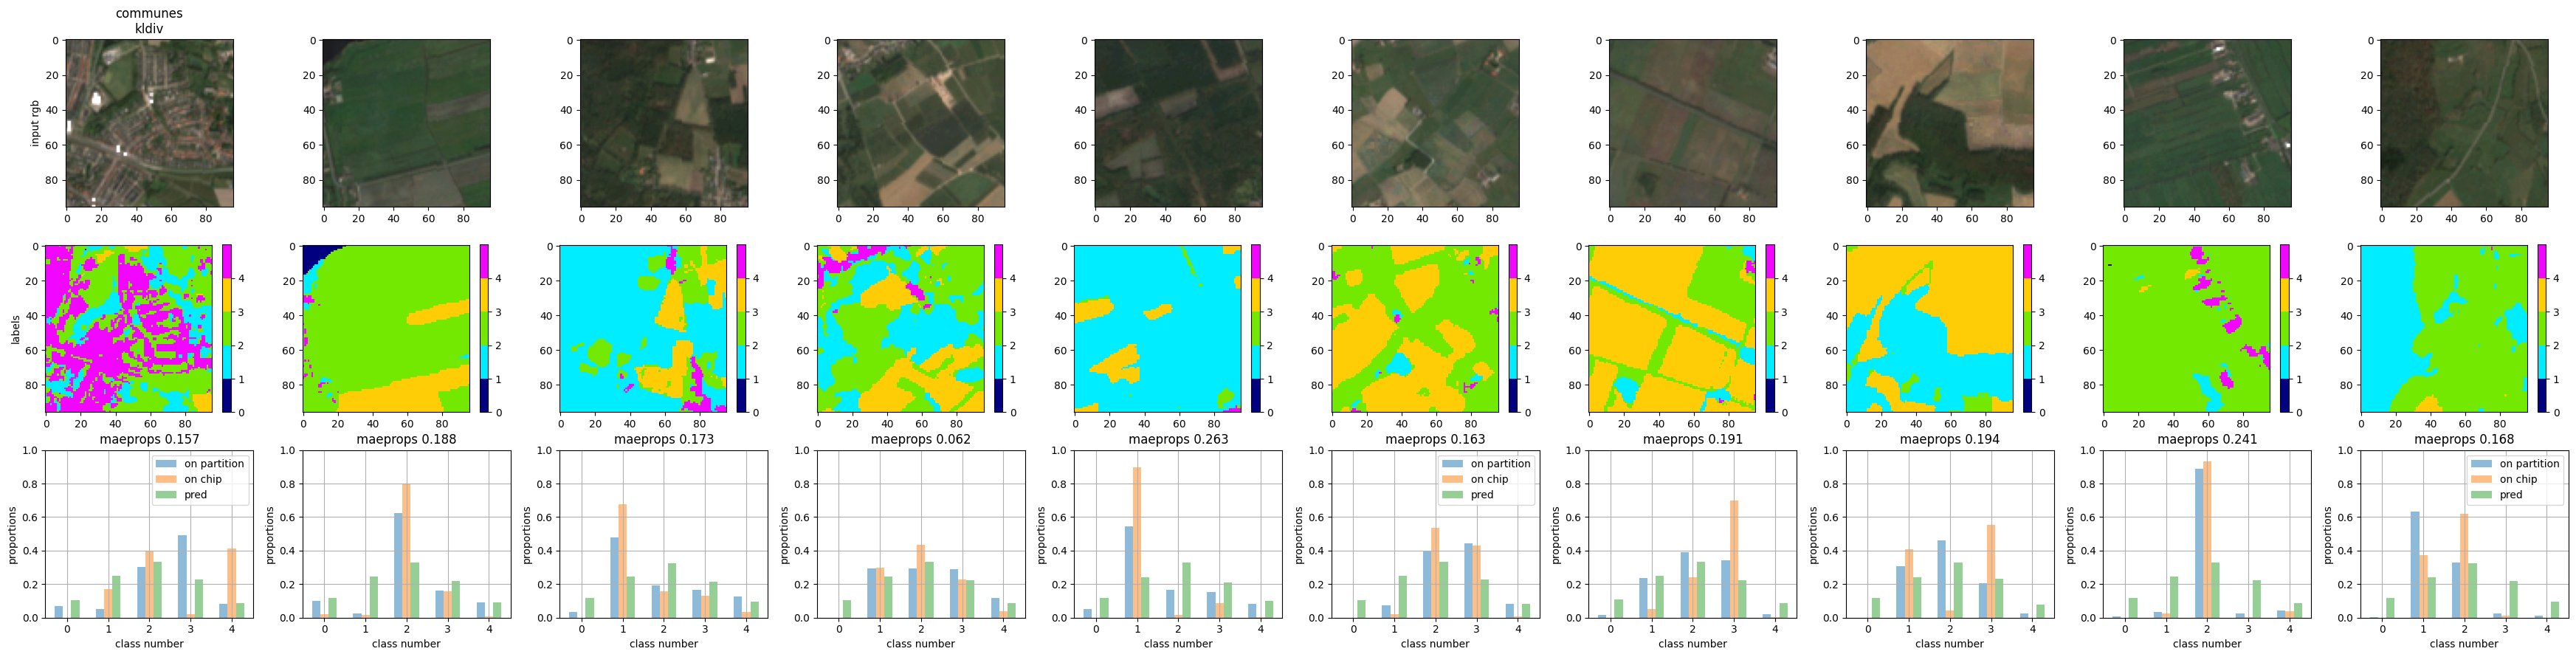

100% (10 of 10) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (2 of 2) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (2 of 2) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00


--------
                            train       val      test
metric                                               
loss                     0.071828  0.056114  0.061045
maeprops_on_chip global  0.176004  0.154663  0.163581
--------
                             train       val      test
metric                                                
maeprops_on_chip class_0  0.104615  0.045232  0.068920
maeprops_on_chip class_1  0.256075  0.266734  0.258468
maeprops_on_chip class_2  0.221664  0.199034  0.223914
maeprops_on_chip class_3  0.249921  0.222295  0.226163
maeprops_on_chip class_4  0.047744  0.040023  0.040440
--------


In [100]:
run.run()

In [64]:
run.run_id

'n64cxani'

In [30]:
!ls $run.outdir/$run.run_id*

/tmp/36x0lnci.csv  /tmp/36x0lnci.h5  /tmp/36x0lnci.params


In [31]:
reload(runs)
reload(autoinit)
self = run

rrun = runs.Run.load_from(f"/tmp/{run.run_id}.params").initialize()

autoinit on Run
using model AEQMPatchSegmModel
using partitions communes
using loss kldiv
got 35666 chips in total
got    695 chips on 21 batches. cache size is 6950
got    141 chips on 4 batches. cache size is 1410
got    164 chips on 5 batches. cache size is 1640
autoinit on AEQMPatchSegmModel
setting input shape to (96, 96, 3)
2/2 [==============================] - 1s 524ms/step
restoring model weights from file
